In [4]:
# Cell 1: imports and loading of all histories

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = (6, 4)

# Point to the real 'examples' directory from inside 'analysis/'
examples_dir = Path("..") / "examples"

print("Notebook working directory:", Path(".").resolve())
print("Using examples_dir:", examples_dir.resolve())

all_runs = []

# ---- Load BASELINE runs ----
for path in examples_dir.glob("tbpsa_baseline_out_seed*/history.csv"):
    df = pd.read_csv(path)
    seed = int(path.parent.name.split("seed")[-1])
    df["algo"] = "baseline"
    df["seed"] = seed

    # make sure 'step' exists (baseline already has it, but just in case)
    if "step" not in df.columns:
        df["step"] = None

    all_runs.append(df)
    print("Loaded baseline:", path, "cols:", df.columns.tolist())

# ---- Load SIGMA-AWARE runs ----
for path in examples_dir.glob("tbpsa_sigma_weighted_out_seed*/history.csv"):
    df = pd.read_csv(path)
    seed = int(path.parent.name.split("seed")[-1])
    df["algo"] = "sigma-aware"
    df["seed"] = seed

    # sigma-aware CSVs don’t have 'step' → add dummy column
    if "step" not in df.columns:
        df["step"] = None

    all_runs.append(df)
    print("Loaded sigma-aware:", path, "cols:", df.columns.tolist())

if not all_runs:
    raise RuntimeError("No history.csv files found. Check examples_dir path above.")

# Concatenate everything into one big table
results = pd.concat(all_runs, ignore_index=True)
results.head()

Notebook working directory: C:\Users\Faye\Documents\nevergrad-sigma-tbpsa\analysis
Using examples_dir: C:\Users\Faye\Documents\nevergrad-sigma-tbpsa\examples
Loaded baseline: ..\examples\tbpsa_baseline_out_seed0\history.csv cols: ['iter', 'evals', 'noisy_best', 'true_best', 'sigma_best', 'step', 'x_best', 'algo', 'seed']
Loaded baseline: ..\examples\tbpsa_baseline_out_seed1\history.csv cols: ['iter', 'evals', 'noisy_best', 'true_best', 'sigma_best', 'step', 'x_best', 'algo', 'seed']
Loaded baseline: ..\examples\tbpsa_baseline_out_seed2\history.csv cols: ['iter', 'evals', 'noisy_best', 'true_best', 'sigma_best', 'step', 'x_best', 'algo', 'seed']
Loaded baseline: ..\examples\tbpsa_baseline_out_seed3\history.csv cols: ['iter', 'evals', 'noisy_best', 'true_best', 'sigma_best', 'step', 'x_best', 'algo', 'seed']
Loaded baseline: ..\examples\tbpsa_baseline_out_seed4\history.csv cols: ['iter', 'evals', 'noisy_best', 'true_best', 'sigma_best', 'step', 'x_best', 'algo', 'seed']
Loaded sigma-awar

,iter,evals,noisy_best,true_best,sigma_best,step,x_best,algo,seed
0,1,10,0.770590,0.741347,0.232585,1.000000,0.12573|-0.132105|0.640423|0.1049|-0.535669,baseline,0
1,2,20,0.770590,0.741347,0.232585,0.995000,0.12573|-0.132105|0.640423|0.1049|-0.535669,baseline,0
2,3,30,0.319515,0.528188,0.206686,0.990025,-0.160156|-0.0494622|-0.200708|-0.400629|-0.54...,baseline,0
3,4,40,0.319515,0.528188,0.206686,0.985075,-0.160156|-0.0494622|-0.200708|-0.400629|-0.54...,baseline,0
4,5,50,0.319515,0.528188,0.206686,0.980150,-0.160156|-0.0494622|-0.200708|-0.400629|-0.54...,baseline,0


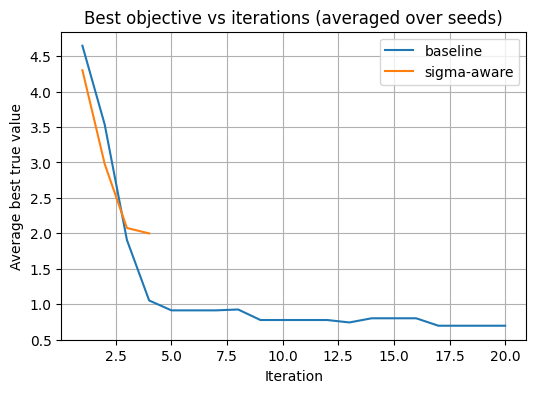

In [5]:
# Cell 2: average best true objective vs iteration for each algorithm

# Group by algorithm and iteration, average the true_best value
avg_curve = (
    results
    .groupby(["algo", "iter"])["true_best"]
    .mean()
    .reset_index()
)

plt.figure()
for algo, df_algo in avg_curve.groupby("algo"):
    plt.plot(df_algo["iter"], df_algo["true_best"], label=algo)

plt.xlabel("Iteration")
plt.ylabel("Average best true value")
plt.title("Best objective vs iterations (averaged over seeds)")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Faye\AppData\Local\Temp\ipykernel_19756\216047967.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


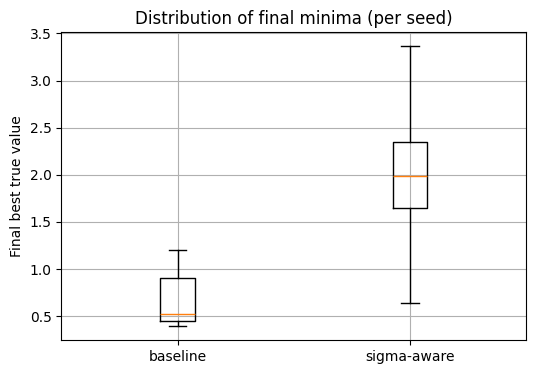

(count    5.000000
 mean     0.695969
 std      0.345100
 min      0.392856
 25%      0.452827
 50%      0.528188
 75%      0.907549
 max      1.198426
 Name: true_best, dtype: float64,
 count    5.000000
 mean     1.998113
 std      0.995062
 min      0.638933
 25%      1.645729
 50%      1.991341
 75%      2.350990
 max      3.363572
 Name: true_best, dtype: float64)

In [6]:
# Cell 3: distribution of final best true value per algorithm

# Take the last recorded row for each (algo, seed) run
last_points = (
    results
    .groupby(["algo", "seed"])
    .tail(1)
    .reset_index(drop=True)
)

baseline_final = last_points[last_points["algo"] == "baseline"]["true_best"]
sigma_final    = last_points[last_points["algo"] == "sigma-aware"]["true_best"]

plt.figure()
plt.boxplot(
    [baseline_final, sigma_final],
    labels=["baseline", "sigma-aware"],
)
plt.ylabel("Final best true value")
plt.title("Distribution of final minima (per seed)")
plt.grid(True)
plt.show()

baseline_final.describe(), sigma_final.describe()

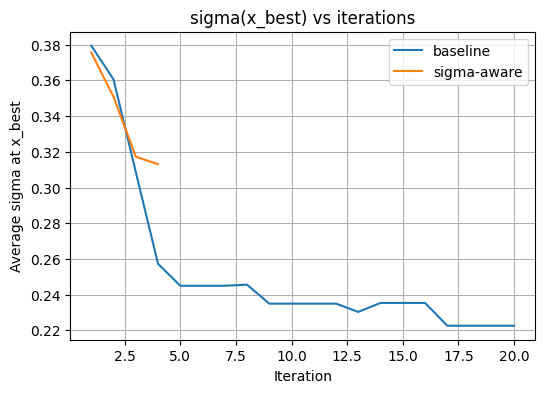

In [ ]:
# Cell 4: how sigma at x_best evolves (averaged across seeds)

avg_sigma = (
    results
    .groupby(["algo", "iter"])["sigma_best"]
    .mean()
    .reset_index()
)

plt.figure()
for algo, df_algo in avg_sigma.groupby("algo"):
    plt.plot(df_algo["iter"], df_algo["sigma_best"], label=algo)

plt.xlabel("Iteration")
plt.ylabel("Average sigma at x_best")
plt.title("sigma(x_best) vs iterations")
plt.legend()
plt.grid(True)
plt.show()